In [1]:
#needed imports
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_categorias_autores=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_categorias_autores

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-30 12:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin"
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 13:54:15.489743,P2,A1,2020,Academic,Analyze Time,A12020,"Technische Universität, Berlin"
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-30 14:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-30 15:54:15.489743,P2,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-30 16:54:15.489743,P2,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2022-01-08 19:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2022-01-08 20:54:15.489743,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-01-08 21:54:15.489743,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2022-01-08 22:54:15.489743,P1,A19,2020,Professional,Analyze Time,A192020,Sberbank


In [154]:
#Representation of the types of operations in each BPI

In [155]:
tipos_op_agrupado_años=df_categorias_autores.groupby("Year").apply(lambda x: x['Type'].value_counts()/len(x['Type'])*100)

In [156]:
tipos_op_agrupado_años

Year                      
2015  Analyze Time            37.209302
      Manipulation            23.255814
      Identification          15.116279
      Calculate statistics    11.627907
      Representation           9.302326
      Others                   3.488372
2017  Analyze Time            39.622642
      Calculate statistics    19.339623
      Manipulation            18.867925
      Representation          13.679245
      Identification           5.660377
      Others                   2.830189
2019  Manipulation            24.324324
      Analyze Time            21.621622
      Calculate statistics    21.081081
      Representation          21.081081
      Identification           9.189189
      Others                   2.702703
2020  Analyze Time            32.903226
      Calculate statistics    21.935484
      Manipulation            18.494624
      Representation          16.989247
      Identification           8.602151
      Others                   1.075269
Name: Type, d

In [92]:
#sumAños=[tipos_op_agrupado_años[tipos_op_agrupado_años.index.get_level_values('Year')==val].sum() for val in [2015,2017,2019,2020]]

In [93]:
# for index,value in tipos_op_agrupado_años.items():
#     if 2015 in index:
#         tipos_op_agrupado_años[index]=(value/sumAños[0])*100
#     elif 2017 in index:
#         tipos_op_agrupado_años[index]=(value/sumAños[1])*100
#     elif 2019 in index:
#         tipos_op_agrupado_años[index]=(value/sumAños[2])*100
#     elif 2020 in index:
#         tipos_op_agrupado_años[index]=(value/sumAños[3])*100

In [98]:
tipos_op_agrupado_años.index

MultiIndex([(2015,         'Analyze Time'),
            (2015,         'Manipulation'),
            (2015,       'Identification'),
            (2015, 'Calculate statistics'),
            (2015,       'Representation'),
            (2015,               'Others'),
            (2017,         'Analyze Time'),
            (2017, 'Calculate statistics'),
            (2017,         'Manipulation'),
            (2017,       'Representation'),
            (2017,       'Identification'),
            (2017,               'Others'),
            (2019,         'Manipulation'),
            (2019,         'Analyze Time'),
            (2019, 'Calculate statistics'),
            (2019,       'Representation'),
            (2019,       'Identification'),
            (2019,               'Others'),
            (2020,         'Analyze Time'),
            (2020, 'Calculate statistics'),
            (2020,         'Manipulation'),
            (2020,       'Representation'),
            (2020,       'Identi

In [157]:
years=[]
types=[]
counts=[]
for i, v in tipos_op_agrupado_años.items():
    #print('year: ', i[0],'type: ',i[1], 'value: ', v)
    years.append(i[0])
    types.append(i[1])
    counts.append(v)

In [158]:
data = {'Years':years, 'Types':types, 'Counts':counts}
# Create DataFrame.
df = pd.DataFrame(data)
df

,Years,Types,Counts
0,2015,Analyze Time,37.209302
1,2015,Manipulation,23.255814
2,2015,Identification,15.116279
3,2015,Calculate statistics,11.627907
4,2015,Representation,9.302326
5,2015,Others,3.488372
6,2017,Analyze Time,39.622642
7,2017,Calculate statistics,19.339623
8,2017,Manipulation,18.867925
9,2017,Representation,13.679245


Text(0, 0.5, 'Percentage of operations')

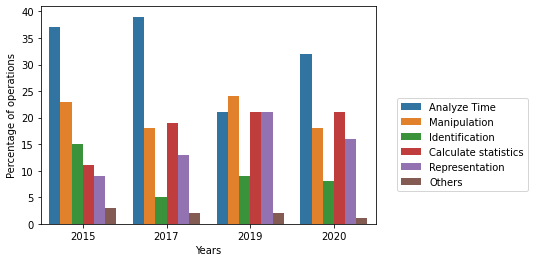

In [140]:
sns.barplot(x=df["Years"], y=df["Counts"], hue=df["Types"])#, data=df)
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")

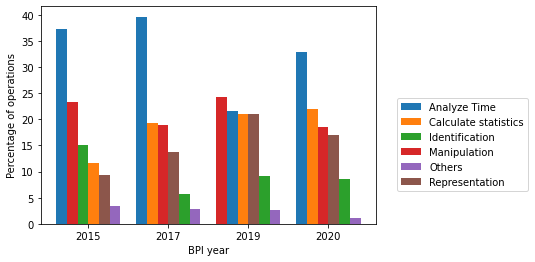

In [159]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)


fig, ax = plt.subplots()    
sortedgroupedbar(ax, x="Years",y="Counts", groupby="Types", data=df)
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.xlabel("BPI year")
plt.savefig('operationTypeDistributionPerBPI.pdf')

In [88]:
tipos_op_agrupado_años=tipos_op_agrupado_años.apply(lambda x: x)
year_type_count=tipos_op_agrupado_años.to_frame()

In [87]:
tipos_op_agrupado_años.index

MultiIndex([(2015,         'Analyze Time'),
            (2015,         'Manipulation'),
            (2015,       'Identification'),
            (2015, 'Calculate statistics'),
            (2015,       'Representation'),
            (2015,               'Others'),
            (2017,         'Analyze Time'),
            (2017, 'Calculate statistics'),
            (2017,         'Manipulation'),
            (2017,       'Representation'),
            (2017,       'Identification'),
            (2017,               'Others'),
            (2019,         'Manipulation'),
            (2019,         'Analyze Time'),
            (2019, 'Calculate statistics'),
            (2019,       'Representation'),
            (2019,       'Identification'),
            (2019,               'Others'),
            (2020,         'Analyze Time'),
            (2020, 'Calculate statistics'),
            (2020,         'Manipulation'),
            (2020,       'Representation'),
            (2020,       'Identi

In [78]:
year_type_count.unstack().transpose().sort_values(by=[2015,2017,2019,2020],axis=0,ascending=False)

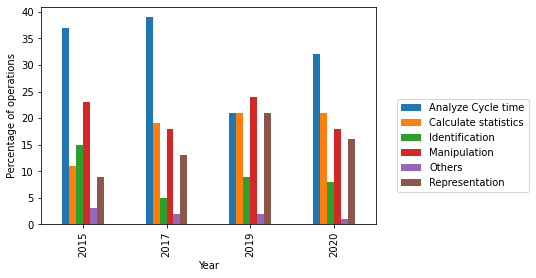

In [108]:
tipos_op_agrupado_años.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.show()

In [16]:
#Now we check how many operations are in common between BPIs and we represented in a heatmap

In [17]:
years1=[2015,2017,2019,2020]
years2=[2015,2017,2019,2020]
df = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["concept:name"]).intersection(set(operationsYear2["concept:name"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[year1]=listaCoincidencias

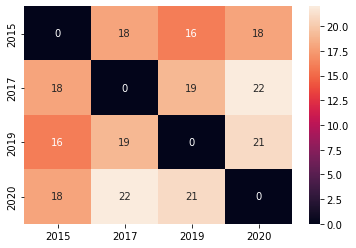

In [18]:
sns.heatmap(df, annot=True)

In [19]:
#Now we check how many variants are in common between BPIs and we represented in a heatmap

In [20]:
df2 = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["Variant"]).intersection(set(operationsYear2["Variant"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[year1]=listaCoincidencias

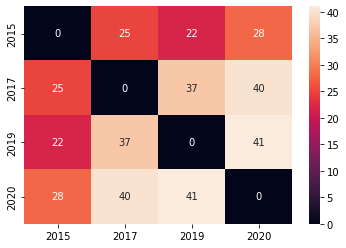

In [21]:
sns.heatmap(df2, annot=True)

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------

In [22]:
#Pair comparison per bpi:

In [23]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
    similitud=float(tamIntersection)/tamUnion
    return similitud

In [24]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [25]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [26]:
df_grouped_year=df_categorias_autores.groupby(by="Year")

In [27]:
years=list(df_grouped_year.groups.keys())

In [28]:
df_grouped_year.get_group(2015).head()

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
152,A2 P5 BPI 2015,A2 P5 BPI 2015,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-12-06 20:54:15.489743,P5,A2,2015,Student,Analyze Time,A22015,University of Tartu
153,A2 P5 BPI 2015,A2 P5 BPI 2015,Filter events,Filter events by cycle time,2021-12-06 21:54:15.489743,P5,A2,2015,Student,Manipulation,A22015,University of Tartu
154,A2 P5 BPI 2015,A2 P5 BPI 2015,Represent histograms,Represent histograms of cycle time,2021-12-06 22:54:15.489743,P5,A2,2015,Student,Representation,A22015,University of Tartu
155,A2 P5 BPI 2015,A2 P5 BPI 2015,Find bottlenecks,Find activities as bottlenecks applying tempor...,2021-12-06 23:54:15.489743,P5,A2,2015,Student,Analyze Time,A22015,University of Tartu
156,A3 P5 BPI 2015,A3 P5 BPI 2015,Group activities,Group activities by sub-processes,2021-12-07 00:54:15.489743,P5,A3,2015,Professional,Manipulation,A32015,KPMG Advisory


In [29]:
dict_df_analysis={"parAnalisis":[],"Categories":[],"Jaccard index":[],"Sorensen index":[],"Overlap index":[]}
df_analisis_similarity=pd.DataFrame.from_dict(dict_df_analysis)

#empty lists to save the results:
parAnalysis=[]
categories=[]
indexSorensen=[]
indexJaccard=[]
indexOverlap=[]               
for i in range(len(years)):# for each year (2015,2017,2019,2020)
    year=years[i] #get year i
    df_i=df_grouped_year.get_group(year)#get the corresponding dataframe
    lista_ids_i=df_i['case:concept:name'].unique().tolist()#list of ids of the answers of dataframe of year i (A4Q12020, A2Q12020,...)

    for j in range(len(years)):
        
        year2=years[j]#now we get another year j
        df_j=df_grouped_year.get_group(year2)#get the corresponding dataframe of the year j
        lista_ids_j=df_j['case:concept:name'].unique().tolist()#list of ids of the answers of dataframe of year j (A2Q52015, A6Q52015,...)
        
        for x in range(len(lista_ids_i)):#for each id in the dataframe year i
            idx=lista_ids_i[x]#we get the id x (e.g. A4Q12020)
            operacionesIdent1=df_i[df_i['case:concept:name']==idx]['concept:name'].unique()#we filter the unique operations related to that answer
            if year==year2:
                ind=x+1
            else:
                ind=0
            #las operaciones de cada case:concept:name de i se comparan con las operaciones de cada case:concept name de j
            for y in range(ind,len(lista_ids_j)): #now we repeat the same process for an answer of year j
                idy=lista_ids_j[y]# e.g. A2Q52015
                operacionesIdent2=df_j[df_j['case:concept:name']==idy]['concept:name'].unique()   
                categories.append(str(year)+" - "+str(year2))
                #now we calculate the similarity index between both answers
                indexSorensen.append(sorensenIndex(operacionesIdent1,operacionesIdent2))
                indexJaccard.append(jaccardIndex(operacionesIdent1,operacionesIdent2))
                indexOverlap.append(overlapIndex(operacionesIdent1,operacionesIdent2))
#                 print(idx+"-"+idy)
#                 print()
                parAnalysis.append(idx+"-"+idy)
                
dict_df={"parAnalisis":parAnalysis,"Categories":categories,"Jaccard index":indexJaccard,"Sorensen index":indexSorensen,"Overlap index":indexOverlap}
df_analisis=pd.DataFrame.from_dict(dict_df)
#print(df_analisis)
df_analisis_similarity=pd.concat([df_analisis_similarity,df_analisis],ignore_index=True)

In [24]:
df_analisis_similarity #final dataframe

,parAnalisis,Categories,Jaccard index,Sorensen index,Overlap index
0,A2 P5 BPI 2015-A3 P5 BPI 2015,2015 - 2015,0.250000,0.400000,0.500000
1,A2 P5 BPI 2015-A4 P5 BPI 2015,2015 - 2015,0.333333,0.500000,0.500000
2,A2 P5 BPI 2015-A7 P5 BPI 2015,2015 - 2015,0.428571,0.600000,0.750000
3,A2 P5 BPI 2015-A8 P5 BPI 2015,2015 - 2015,0.181818,0.307692,0.500000
4,A2 P5 BPI 2015-A9 P5 BPI 2015,2015 - 2015,0.200000,0.333333,0.500000
...,...,...,...,...,...
11947,A30 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.222222,0.363636,0.666667
11948,A30 P5 BPI 2020-A19 P1 BPI 2020,2020 - 2020,0.071429,0.133333,0.142857
11949,A34 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.200000,0.333333,0.333333
11950,A34 P5 BPI 2020-A19 P1 BPI 2020,2020 - 2020,0.111111,0.200000,0.333333


In [26]:
df_analisis_similarity

,parAnalisis,Categories,Jaccard index,Sorensen index,Overlap index
0,A2 P5 BPI 2015-A3 P5 BPI 2015,2015 - 2015,0.250000,0.400000,0.500000
1,A2 P5 BPI 2015-A4 P5 BPI 2015,2015 - 2015,0.333333,0.500000,0.500000
2,A2 P5 BPI 2015-A7 P5 BPI 2015,2015 - 2015,0.428571,0.600000,0.750000
3,A2 P5 BPI 2015-A8 P5 BPI 2015,2015 - 2015,0.181818,0.307692,0.500000
4,A2 P5 BPI 2015-A9 P5 BPI 2015,2015 - 2015,0.200000,0.333333,0.500000
...,...,...,...,...,...
11947,A30 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.222222,0.363636,0.666667
11948,A30 P5 BPI 2020-A19 P1 BPI 2020,2020 - 2020,0.071429,0.133333,0.142857
11949,A34 P5 BPI 2020-A30 P6 BPI 2020,2020 - 2020,0.200000,0.333333,0.333333
11950,A34 P5 BPI 2020-A19 P1 BPI 2020,2020 - 2020,0.111111,0.200000,0.333333


In [27]:
#now we group by the possible comparison and calculate the mean for each index:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Jaccard index"]) )
questionYearCategories

Categories
2015 - 2015    0.259379
2015 - 2017    0.219732
2015 - 2019    0.224993
2015 - 2020    0.191013
2017 - 2015    0.219732
2017 - 2017    0.274885
2017 - 2019    0.197833
2017 - 2020    0.158152
2019 - 2015    0.224993
2019 - 2017    0.197833
2019 - 2019    0.294663
2019 - 2020    0.167723
2020 - 2015    0.191013
2020 - 2017    0.158152
2020 - 2019    0.167723
2020 - 2020    0.181728
dtype: float64

In [144]:
df_analisis_similarity['Categories'].unique()

array(['2015 - 2015', '2015 - 2017', '2015 - 2019', '2015 - 2020',
       '2017 - 2015', '2017 - 2017', '2017 - 2019', '2017 - 2020',
       '2019 - 2015', '2019 - 2017', '2019 - 2019', '2019 - 2020',
       '2020 - 2015', '2020 - 2017', '2020 - 2019', '2020 - 2020'],
      dtype=object)

In [28]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Jaccard index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.112468
2015 - 2017    0.128718
2015 - 2019    0.098588
2015 - 2020    0.133501
2017 - 2015    0.128718
2017 - 2017    0.134824
2017 - 2019    0.131297
2017 - 2020    0.131065
2019 - 2015    0.098588
2019 - 2017    0.131297
2019 - 2019    0.102453
2019 - 2020    0.113778
2020 - 2015    0.133501
2020 - 2017    0.131065
2020 - 2019    0.113778
2020 - 2020    0.191790
dtype: float64

In [29]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Jaccard index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.012649
2015 - 2017    0.016568
2015 - 2019    0.009720
2015 - 2020    0.017823
2017 - 2015    0.016568
2017 - 2017    0.018178
2017 - 2019    0.017239
2017 - 2020    0.017178
2019 - 2015    0.009720
2019 - 2017    0.017239
2019 - 2019    0.010497
2019 - 2020    0.012945
2020 - 2015    0.017823
2020 - 2017    0.017178
2020 - 2019    0.012945
2020 - 2020    0.036783
dtype: float64

In [148]:
#Overlap

In [30]:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Overlap index"]) )
questionYearCategories

Categories
2015 - 2015    0.480655
2015 - 2017    0.430516
2015 - 2019    0.449471
2015 - 2020    0.501322
2017 - 2015    0.430516
2017 - 2017    0.558486
2017 - 2019    0.426859
2017 - 2020    0.421426
2019 - 2015    0.449471
2019 - 2017    0.426859
2019 - 2019    0.582640
2019 - 2020    0.497694
2020 - 2015    0.501322
2020 - 2017    0.421426
2020 - 2019    0.497694
2020 - 2020    0.384795
dtype: float64

In [31]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.176684
2015 - 2017    0.200682
2015 - 2019    0.161938
2015 - 2020    0.318079
2017 - 2015    0.200682
2017 - 2017    0.224433
2017 - 2019    0.235962
2017 - 2020    0.328007
2019 - 2015    0.161938
2019 - 2017    0.235962
2019 - 2019    0.199922
2019 - 2020    0.284216
2020 - 2015    0.318079
2020 - 2017    0.328007
2020 - 2019    0.284216
2020 - 2020    0.345252
dtype: float64

In [32]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.031217
2015 - 2017    0.040273
2015 - 2019    0.026224
2015 - 2020    0.101174
2017 - 2015    0.040273
2017 - 2017    0.050370
2017 - 2019    0.055678
2017 - 2020    0.107589
2019 - 2015    0.026224
2019 - 2017    0.055678
2019 - 2019    0.039969
2019 - 2020    0.080779
2020 - 2015    0.101174
2020 - 2017    0.107589
2020 - 2019    0.080779
2020 - 2020    0.119199
dtype: float64

In [33]:
#Sorensen:

In [34]:
questionYearCategories=df_analisis_similarity.groupby("Categories").apply(lambda x: np.mean(x["Sorensen index"]) )
questionYearCategories

Categories
2015 - 2015    0.399029
2015 - 2017    0.343122
2015 - 2019    0.357041
2015 - 2020    0.300418
2017 - 2015    0.343122
2017 - 2017    0.414164
2017 - 2019    0.311606
2017 - 2020    0.252098
2019 - 2015    0.357041
2019 - 2017    0.311606
2019 - 2019    0.445384
2019 - 2020    0.271846
2020 - 2015    0.300418
2020 - 2017    0.252098
2020 - 2019    0.271846
2020 - 2020    0.268796
dtype: float64

In [35]:
questionYearCategoriesVar=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].var(ddof=0))
questionYearCategoriesVar

Categories
2015 - 2015    0.031217
2015 - 2017    0.040273
2015 - 2019    0.026224
2015 - 2020    0.101174
2017 - 2015    0.040273
2017 - 2017    0.050370
2017 - 2019    0.055678
2017 - 2020    0.107589
2019 - 2015    0.026224
2019 - 2017    0.055678
2019 - 2019    0.039969
2019 - 2020    0.080779
2020 - 2015    0.101174
2020 - 2017    0.107589
2020 - 2019    0.080779
2020 - 2020    0.119199
dtype: float64

In [36]:
questionYearCategoriesStd=df_analisis_similarity.groupby("Categories").apply(lambda x: x["Overlap index"].std(ddof=0))
questionYearCategoriesStd

Categories
2015 - 2015    0.176684
2015 - 2017    0.200682
2015 - 2019    0.161938
2015 - 2020    0.318079
2017 - 2015    0.200682
2017 - 2017    0.224433
2017 - 2019    0.235962
2017 - 2020    0.328007
2019 - 2015    0.161938
2019 - 2017    0.235962
2019 - 2019    0.199922
2019 - 2020    0.284216
2020 - 2015    0.318079
2020 - 2017    0.328007
2020 - 2019    0.284216
2020 - 2020    0.345252
dtype: float64